In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import scipy

In [3]:
plt.rcParams["figure.figsize"] = (15, 10)

## load data

In [4]:
pth_data = '../../data/train.csv'
df_origin = pd.read_csv(pth_data)

In [5]:
df_origin['env_temp'] = (df_origin['env_temp'] - 32) / 1.8

In [6]:
df_origin

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
0,2020-10-19 14:00:00,1.64,54.0,1,20.077335,24,25.550000,62.122,60.0,17.0,NaN,NaN,4.0,4.0,0.74,1.0
1,2020-10-19 14:30:00,1.64,54.0,1,20.077335,24,25.671111,62.321,78.0,60.0,30.748,0.926320,4.0,4.0,0.74,1.1
2,2020-10-19 15:00:00,1.64,54.0,1,20.077335,24,25.841111,62.255,79.0,46.0,31.327,1.232405,4.0,4.0,0.74,1.1
3,2020-10-19 15:30:00,1.64,54.0,1,20.077335,24,26.133889,61.491,94.0,91.0,31.458,0.375005,4.0,4.0,0.74,1.0
4,2020-10-19 16:00:00,1.64,54.0,1,20.077335,24,26.352778,61.071,85.0,71.0,32.085,0.081127,4.0,4.0,0.74,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,2020-10-28 21:30:00,1.63,50.0,1,18.818924,23,24.737778,40.530,73.0,22.0,31.850,0.114876,2.0,3.0,0.50,1.0
2792,2020-10-28 22:00:00,1.63,50.0,1,18.818924,23,24.931111,39.890,70.5,10.0,32.215,0.146231,2.0,3.0,0.50,1.0
2793,2020-10-28 22:30:00,1.63,50.0,1,18.818924,23,25.027778,39.710,72.0,5.0,32.656,0.153838,2.0,3.0,0.50,1.0
2794,2020-10-28 23:00:00,1.63,50.0,1,18.818924,23,24.835000,39.980,66.0,0.0,31.902,0.160930,2.0,3.0,0.50,1.0


In [7]:
org_col = list(df_origin.columns)
org_col

['time',
 'height',
 'weight',
 'gender',
 'bmi',
 'age',
 'env_temp',
 'rh',
 'heart_rate',
 'stress_level',
 'skin_temp',
 'eda',
 'TC',
 'TS',
 'Clo',
 'Act']

In [8]:
org_col[12] = 'TS'
org_col[13] = 'TC'
org_col

['time',
 'height',
 'weight',
 'gender',
 'bmi',
 'age',
 'env_temp',
 'rh',
 'heart_rate',
 'stress_level',
 'skin_temp',
 'eda',
 'TS',
 'TC',
 'Clo',
 'Act']

In [9]:
df_origin.columns = org_col

In [10]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2796 entries, 0 to 2795
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          2796 non-null   object 
 1   height        2796 non-null   float64
 2   weight        2796 non-null   float64
 3   gender        2796 non-null   int64  
 4   bmi           2796 non-null   float64
 5   age           2796 non-null   int64  
 6   env_temp      2796 non-null   float64
 7   rh            2796 non-null   float64
 8   heart_rate    2201 non-null   float64
 9   stress_level  1848 non-null   float64
 10  skin_temp     1874 non-null   float64
 11  eda           2396 non-null   float64
 12  TS            2717 non-null   float64
 13  TC            2712 non-null   float64
 14  Clo           2737 non-null   float64
 15  Act           2718 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 349.6+ KB


## data process

### choose data: TC < 4.0
|TC）	| |
|---|---|
|1|	Very uncomfortable|
|2|	Uncomfortable|
|3|	Slightly uncomfortable|
|4|	Neutral|
|5|	Slightly comfortable|
|6|	Comfortable|
|7|	Very comfortable|

In [11]:
df_origin[df_origin[['TC']].isna().TC].shape
# some na in clo, means unrecorded data

(84, 16)

In [12]:
df_ts_nona = df_origin[df_origin['TC'].isna() ^ True]

In [13]:
df_ts_nona.shape

(2712, 16)

In [14]:
df_ts_edge = df_ts_nona[df_ts_nona['TC'] < 4.0]

In [15]:
df_ts_edge.shape

(394, 16)

In [16]:
df_ts_edge.head()

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TS,TC,Clo,Act
50,2020-10-21 02:30:00,1.64,54.0,1,20.077335,24,25.792778,61.044,81.0,7.0,32.552,0.169282,3.0,3.0,0.74,1.0
51,2020-10-21 03:00:00,1.64,54.0,1,20.077335,24,25.767778,61.040,65.0,2.0,32.474,0.171619,3.0,3.0,0.74,1.0
52,2020-10-21 03:30:00,1.64,54.0,1,20.077335,24,25.622778,60.745,NaN,0.0,32.889,0.177812,3.0,3.0,0.74,1.0
53,2020-10-21 04:00:00,1.64,54.0,1,20.077335,24,25.622778,60.835,58.0,0.0,32.292,0.172982,3.0,2.0,0.74,1.0
62,2020-10-21 16:00:00,1.64,54.0,1,20.077335,24,25.525000,61.636,70.0,20.0,32.059,0.263771,3.0,3.0,0.74,1.0


### choose data: TS < 4.0 
|TS）|  |
|--|--|	
|1|	Very cool|
|2|	Cool|
|3|	Slight cool|
|4|	Neutral|
|5|	Slightly warm|
|6|	Warm|
|7|	Very warm|

In [17]:
df_ts_edge[df_ts_edge[['TS']].isna().TS].shape

(0, 16)

In [18]:
df_TC_nona = df_ts_edge[df_ts_edge['TS'].isna() ^ True]

In [19]:
df_TC_nona.shape

(394, 16)

In [20]:
df_comfort_edge_low = df_TC_nona[df_TC_nona['TS'] < 4.0]

In [21]:
df_comfort_edge_low = df_comfort_edge_low[df_comfort_edge_low['TS'] > 1.0]

In [22]:
df_comfort_edge_low.shape

(324, 16)

In [23]:
df_comfort = df_comfort_edge_low
df_comfort

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TS,TC,Clo,Act
50,2020-10-21 02:30:00,1.64,54.0,1,20.077335,24,25.792778,61.044,81.0,7.0,32.552,0.169282,3.0,3.0,0.74,1.0
51,2020-10-21 03:00:00,1.64,54.0,1,20.077335,24,25.767778,61.040,65.0,2.0,32.474,0.171619,3.0,3.0,0.74,1.0
52,2020-10-21 03:30:00,1.64,54.0,1,20.077335,24,25.622778,60.745,NaN,0.0,32.889,0.177812,3.0,3.0,0.74,1.0
53,2020-10-21 04:00:00,1.64,54.0,1,20.077335,24,25.622778,60.835,58.0,0.0,32.292,0.172982,3.0,2.0,0.74,1.0
62,2020-10-21 16:00:00,1.64,54.0,1,20.077335,24,25.525000,61.636,70.0,20.0,32.059,0.263771,3.0,3.0,0.74,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,2020-10-28 21:30:00,1.63,50.0,1,18.818924,23,24.737778,40.530,73.0,22.0,31.850,0.114876,2.0,3.0,0.50,1.0
2792,2020-10-28 22:00:00,1.63,50.0,1,18.818924,23,24.931111,39.890,70.5,10.0,32.215,0.146231,2.0,3.0,0.50,1.0
2793,2020-10-28 22:30:00,1.63,50.0,1,18.818924,23,25.027778,39.710,72.0,5.0,32.656,0.153838,2.0,3.0,0.50,1.0
2794,2020-10-28 23:00:00,1.63,50.0,1,18.818924,23,24.835000,39.980,66.0,0.0,31.902,0.160930,2.0,3.0,0.50,1.0


### visualization

In [24]:
df_visual = df_comfort[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act', 'env_temp']]

In [25]:
df_visual.head()

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
50,1.64,54.0,1,20.077335,24,61.044,81.0,7.0,32.552,0.169282,0.74,1.0,25.792778
51,1.64,54.0,1,20.077335,24,61.040,65.0,2.0,32.474,0.171619,0.74,1.0,25.767778
52,1.64,54.0,1,20.077335,24,60.745,NaN,0.0,32.889,0.177812,0.74,1.0,25.622778
53,1.64,54.0,1,20.077335,24,60.835,58.0,0.0,32.292,0.172982,0.74,1.0,25.622778
62,1.64,54.0,1,20.077335,24,61.636,70.0,20.0,32.059,0.263771,0.74,1.0,25.525000


#### pairplot
download it to zoom in

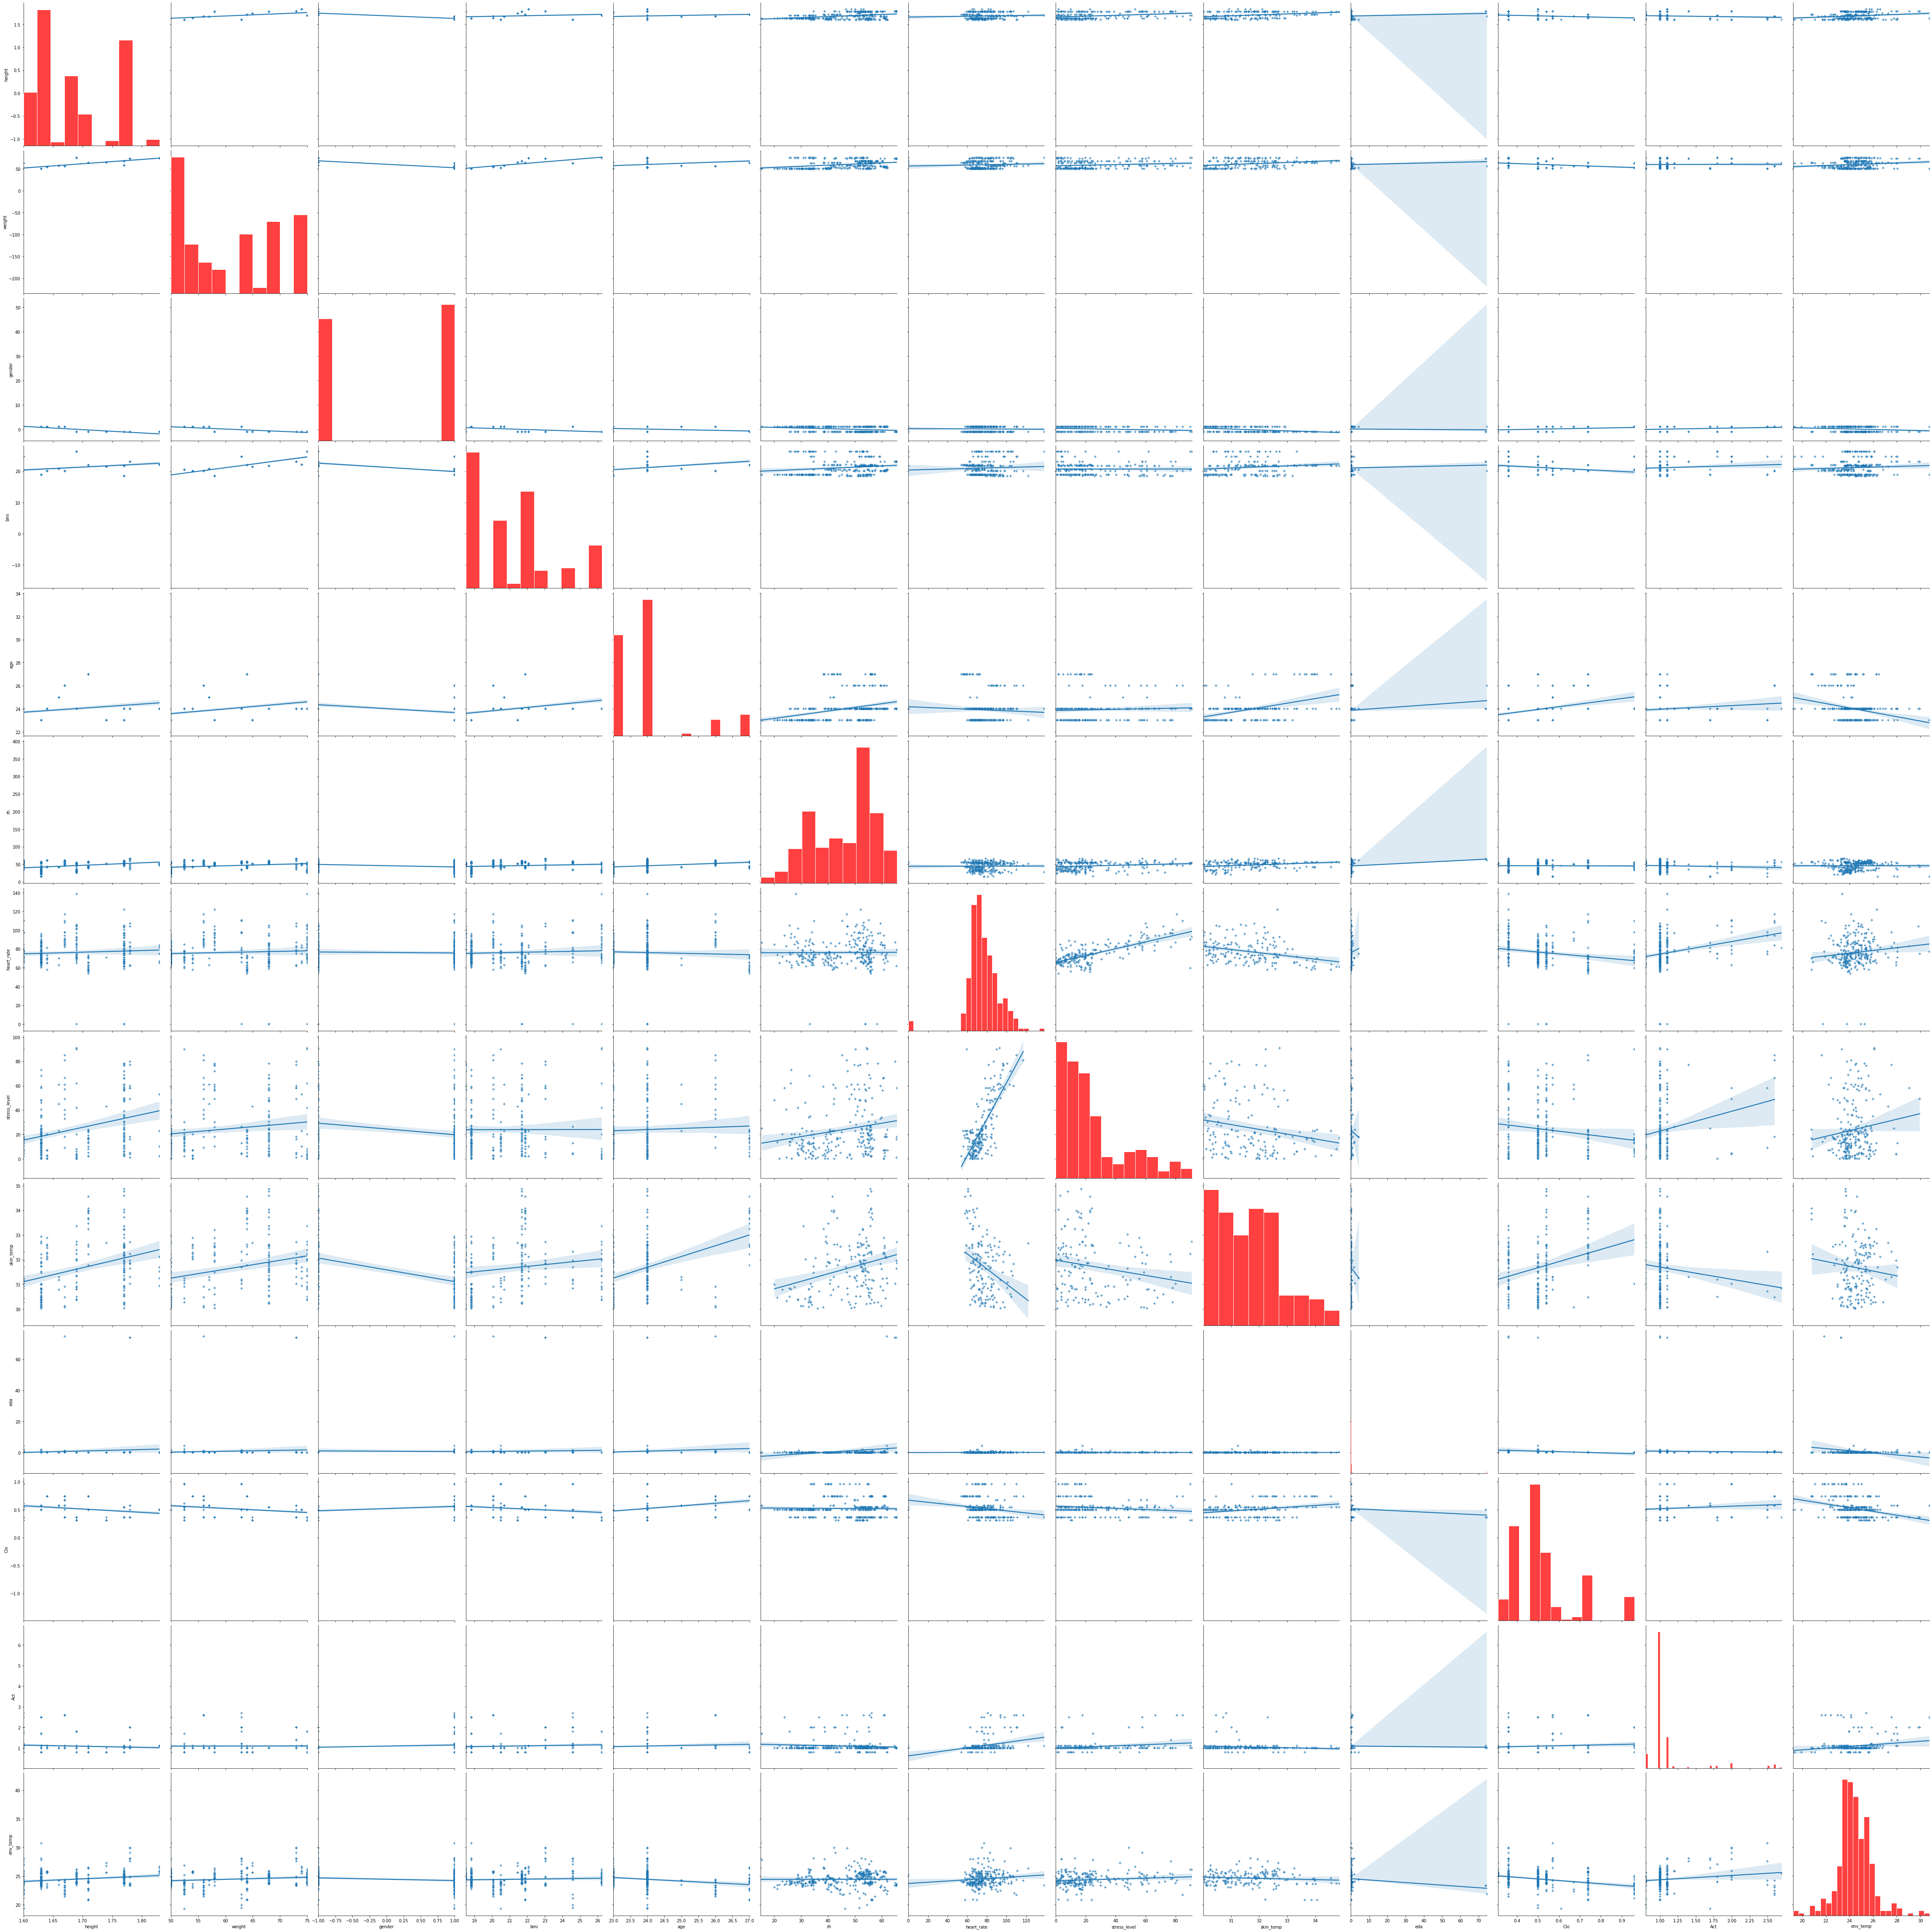

In [26]:
sns.pairplot(df_visual, dropna=True, kind='reg', markers='+', height=5, aspect=1,
            diag_kws=dict(edgecolor="w", color="r"))

#### correlation map

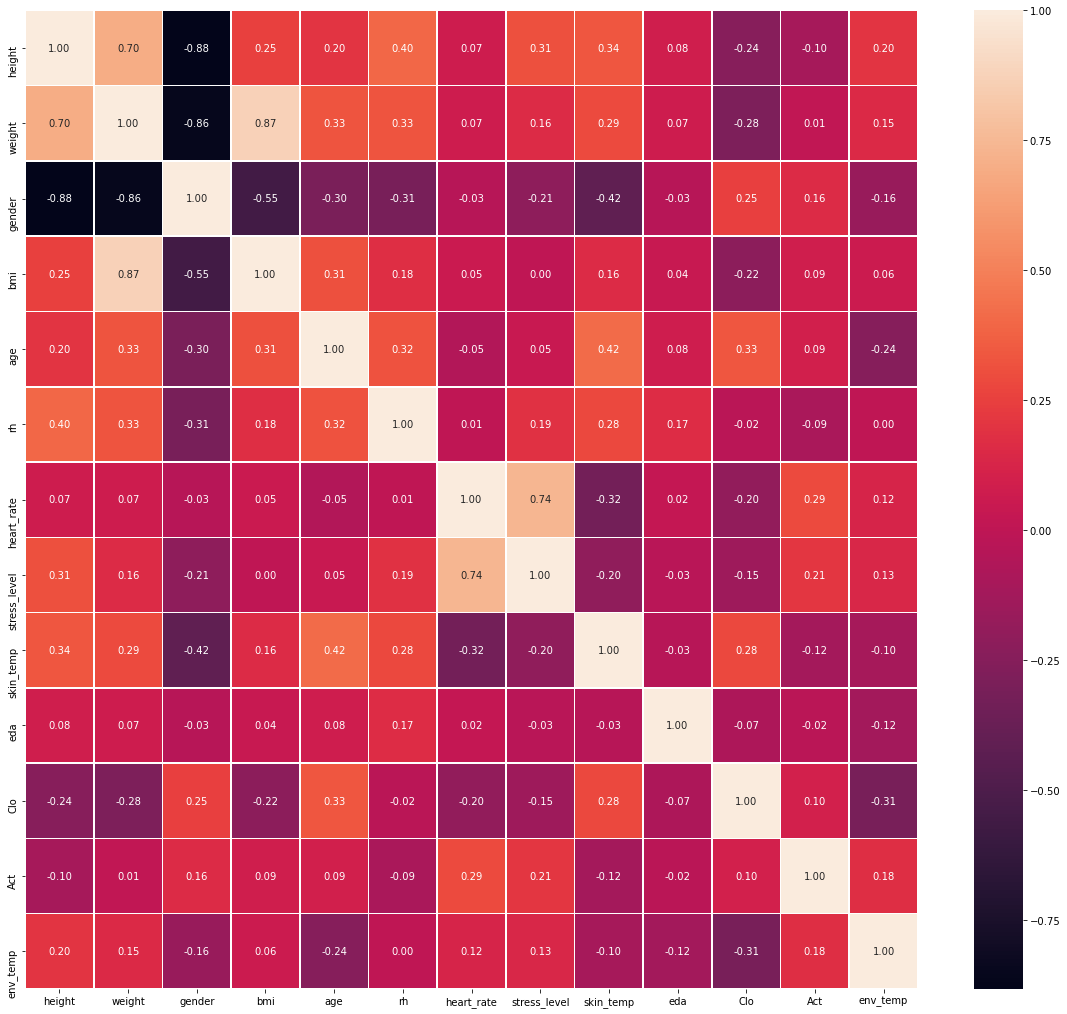

In [27]:
# correlation map
plt.rcParams["figure.figsize"] = (20, 18)
sns.heatmap(df_visual.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show()

### shuffle

In [28]:
df_shuffle = df_comfort.sample(frac=1, random_state=1208).reset_index(drop=True)

In [29]:
X_data = df_shuffle[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act']]

In [30]:
X_cols_name = X_data.columns

In [31]:
y_data = df_shuffle['env_temp']

### imputation

In [32]:
df_comfort[df_comfort[['env_temp']].isna().env_temp]
# no na in env_temp

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TS,TC,Clo,Act


In [33]:
imp = SimpleImputer(strategy='mean')

In [34]:
X_data = pd.DataFrame(imp.fit_transform(X_data), columns=X_cols_name)

In [35]:
X_data_not_norm = pd.DataFrame(imp.fit_transform(X_data), columns=X_cols_name)

#### save data
for test use (imputated but not normalized data)

In [36]:
df_not_norm = pd.concat([X_data_not_norm, y_data], axis=1)

In [37]:
df_not_norm.to_csv('../processed_data/data_imputated_not_norm.csv', index=False)

In [38]:
df_not_norm

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
0,1.63,50.0,1.0,18.818924,23.0,39.890,70.500000,10.000000,32.215000,0.146231,0.50,1.0,24.931111
1,1.74,65.0,-1.0,21.469150,23.0,51.680,76.298872,23.987342,31.672874,0.877379,0.36,1.0,26.781111
2,1.77,68.0,-1.0,21.705129,24.0,55.748,66.000000,6.000000,33.353000,0.033414,0.54,1.0,23.592778
3,1.63,50.0,1.0,18.818924,23.0,34.850,74.000000,20.000000,31.672874,0.068829,0.50,1.0,23.868889
4,1.77,58.0,-1.0,18.513199,23.0,51.275,97.000000,76.500000,32.215000,0.006481,0.36,1.0,25.427778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.78,73.0,-1.0,23.040020,24.0,65.400,76.298872,23.987342,31.672874,73.937247,0.50,1.0,23.292222
320,1.69,75.0,-1.0,26.259585,24.0,31.690,70.000000,0.000000,32.007000,0.012316,0.36,1.0,23.772778
321,1.69,75.0,-1.0,26.259585,24.0,25.660,105.000000,23.987342,30.484000,0.002907,0.36,1.8,23.966111
322,1.71,64.0,-1.0,21.887076,27.0,42.280,59.000000,23.000000,33.996000,0.068711,0.74,1.0,24.157778


### normalize
linear regression need this. random forest doesn't need

In [39]:
X_array_normalize, X_norm = normalize(X_data, axis=0, return_norm=True)

In [40]:
X_data = pd.DataFrame(X_array_normalize, columns=X_cols_name)

In [41]:
X_data

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act
0,0.053777,0.045653,0.055556,0.049077,0.053194,0.046726,0.050415,0.018183,0.056487,0.001136,0.050868,0.048122
1,0.057406,0.059349,-0.055556,0.055988,0.053194,0.060537,0.054562,0.043617,0.055536,0.006819,0.036625,0.048122
2,0.058395,0.062088,-0.055556,0.056604,0.055507,0.065302,0.047197,0.010910,0.058482,0.000260,0.054937,0.048122
3,0.053777,0.045653,0.055556,0.049077,0.053194,0.040823,0.052918,0.036367,0.055536,0.000535,0.050868,0.048122
4,0.058395,0.052958,-0.055556,0.048280,0.053194,0.060062,0.069366,0.139104,0.056487,0.000050,0.036625,0.048122
...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.058725,0.066654,-0.055556,0.060085,0.055507,0.076608,0.054562,0.043617,0.055536,0.574616,0.050868,0.048122
320,0.055756,0.068480,-0.055556,0.068481,0.055507,0.037121,0.050058,0.000000,0.056122,0.000096,0.036625,0.048122
321,0.055756,0.068480,-0.055556,0.068481,0.055507,0.030058,0.075086,0.043617,0.053452,0.000023,0.036625,0.086620
322,0.056416,0.058436,-0.055556,0.057078,0.062445,0.049526,0.042191,0.041822,0.059610,0.000534,0.075284,0.048122


In [42]:
X_norm

array([  30.31058231, 1095.21561804,   18.        ,  383.45696797,
        432.37715018,  853.69505084, 1398.38738838,  549.95013699,
        570.3090419 ,  128.67248241,    9.82938452,   20.78051972])

## refine data

In [44]:
regr = sm.OLS(y_data, X_data)
regr_fit = regr.fit()

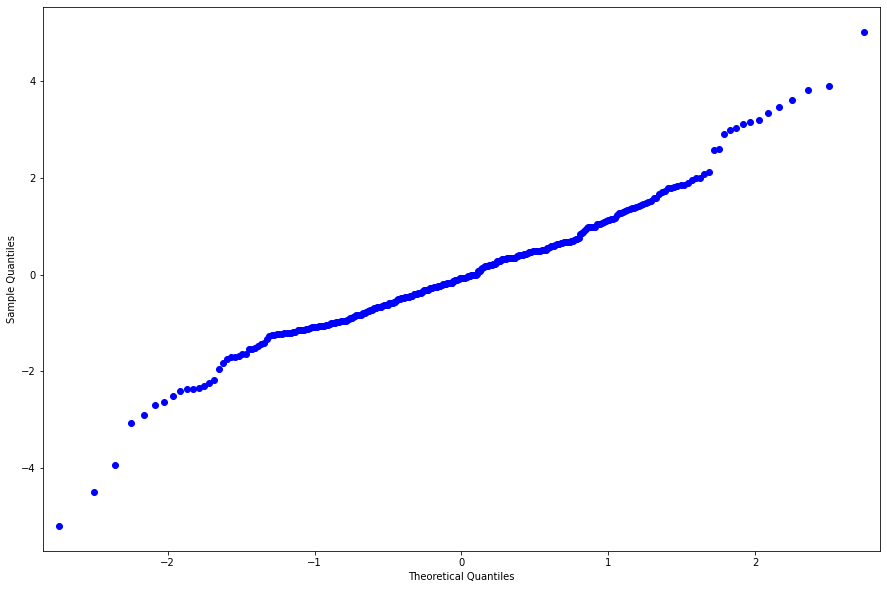

In [45]:
plt.rcParams["figure.figsize"] = (15, 10)
sm.qqplot(regr_fit.resid)
plt.show()

### leverage & outlier

In [46]:
infl = regr_fit.get_influence()

In [47]:
# leverage
leviers = infl.hat_matrix_diag
# list(leviers)

In [48]:
# studentized residue
res_studs = infl.resid_studentized_external
# list(res_studs)

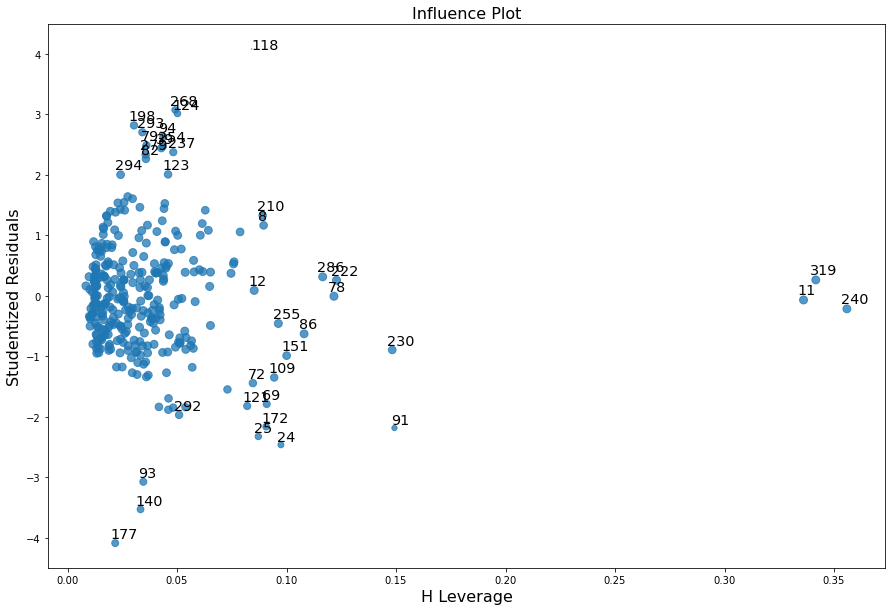

In [49]:
plt.rcParams["figure.figsize"] = (15, 10)
sm.graphics.influence_plot(regr_fit, size=0.5)
plt.show()

### leverage detection
the threshold value may be:
$$s_h=2\times \frac{p+1}{n}$$

In [50]:
n_data = X_data.shape[0]
p_data = X_data.shape[1]

In [51]:
s_h = 2 * (p_data + 1) / n_data
s_h

0.08024691358024691

In [52]:
atyp_levier = leviers > s_h

In [53]:
len(leviers[atyp_levier])

22

### outlier detection
Threshold:
$$s_t=t_{1-0.05/2}(n-p-2)$$

In [54]:
seuil_stud = scipy.stats.t.ppf(0.975, df=n_data-p_data-2)
seuil_stud

1.967645928777568

In [55]:
atyp_stud = np.abs(res_studs) > seuil_stud
atyp_stud

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,

In [56]:
idx_eliminate_lvg_outl = np.logical_not(np.logical_or(atyp_levier, atyp_stud))

In [57]:
X_data.index[idx_eliminate_lvg_outl]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            313, 314, 315, 316, 317, 318, 320, 321, 322, 323],
           dtype='int64', length=285)

In [58]:
X_data_refine = X_data[idx_eliminate_lvg_outl]
y_data_refine = y_data[idx_eliminate_lvg_outl]

### save refine data (not normalized)

In [59]:
X_data_refine_not_norm = X_data_not_norm[idx_eliminate_lvg_outl]
y_data_refine_not_norm = y_data[idx_eliminate_lvg_outl]

In [60]:
df_refine_not_norm = pd.concat([X_data_refine_not_norm, y_data_refine_not_norm], axis=1)

In [61]:
df_refine_not_norm.to_csv('../processed_data/train_refine_not_norm_min.csv', index=False)

In [62]:
df_refine_not_norm

,height,weight,gender,bmi,age,rh,heart_rate,stress_level,skin_temp,eda,Clo,Act,env_temp
0,1.63,50.0,1.0,18.818924,23.0,39.890,70.500000,10.000000,32.215000,0.146231,0.50,1.0,24.931111
1,1.74,65.0,-1.0,21.469150,23.0,51.680,76.298872,23.987342,31.672874,0.877379,0.36,1.0,26.781111
2,1.77,68.0,-1.0,21.705129,24.0,55.748,66.000000,6.000000,33.353000,0.033414,0.54,1.0,23.592778
3,1.63,50.0,1.0,18.818924,23.0,34.850,74.000000,20.000000,31.672874,0.068829,0.50,1.0,23.868889
4,1.77,58.0,-1.0,18.513199,23.0,51.275,97.000000,76.500000,32.215000,0.006481,0.36,1.0,25.427778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1.63,50.0,1.0,18.818924,23.0,55.330,65.000000,9.000000,31.672874,0.009863,0.50,0.8,24.835000
320,1.69,75.0,-1.0,26.259585,24.0,31.690,70.000000,0.000000,32.007000,0.012316,0.36,1.0,23.772778
321,1.69,75.0,-1.0,26.259585,24.0,25.660,105.000000,23.987342,30.484000,0.002907,0.36,1.8,23.966111
322,1.71,64.0,-1.0,21.887076,27.0,42.280,59.000000,23.000000,33.996000,0.068711,0.74,1.0,24.157778


## linear regression
try after refine

In [63]:
n_rows = y_data_refine.shape[0]

train_test_fraction = 0.8
n_rows_train = int(n_rows * train_test_fraction)
# n_rows_test = n_rows - n_rows_train

X_train = X_data_refine[:n_rows_train]
y_train = y_data_refine[:n_rows_train]

X_test = X_data_refine[n_rows_train:]
y_test = y_data_refine[n_rows_train:]

In [64]:
regr = sm.OLS(y_train, X_train)

In [65]:
regr_fit = regr.fit()

In [66]:
y_pred = regr_fit.predict(X_test)

In [67]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
260,23.581111,23.969437
261,24.641111,24.433066
262,24.255000,24.306356
263,23.688889,24.635317
264,23.772778,25.238984
265,23.292222,23.949585
266,25.016111,24.777813
267,25.016111,24.865049
269,22.621111,23.690666
270,25.743889,24.089967


In [68]:
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.369e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                   8.22e-304
Time:                        22:00:32   Log-Likelihood:                         -295.32
No. Observations:                 228   AIC:                                      614.6
Df Residuals:                     216   BIC:                                      655.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
height         590.7765     56.437     10.468      0.000     479.538     702.015
weight        -247.7737     52.054     -4.760      0.000    -350.373    -145.175
gender           1.3732      3.521      0.390      0.697      -5.567       8.313
bmi            250.9407     45.446      5.522      0.000     161.367     340.515
age           -135.1685     32.284     -4.187      0.000    -198.801     -71.536
rh              19.2514      5.585      3.447      0.001       8.244      30.259
heart_rate      -2.4290     10.226     -0.238      0.812     -22.585      17.727
stress_level     0.1739      2.517      0.069      0.945      -4.788       5.135
skin_temp      -46.5980     46.239     -1.008      0.315    -137.736      44.540
eda              4.5590     19.718      0.231      0.817     -34.304      43.422
Clo            -19.3650      4.575     -4.233      0.000     -28.382     -10.348
Act             30.3728      9.751      3.115      0.002      11.154      49.591
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.059
Skew:                          -0.012   Prob(JB):                        0.971
Kurtosis:                       3.075   Cond. No.                         249.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# mean squared error
mean_squared_error(y_test, y_pred)

0.9431763271982548

In [70]:
# R2 score
r2_score(y_test, y_pred)

0.25942782228015115

## feature selection

### correlation map for refine data

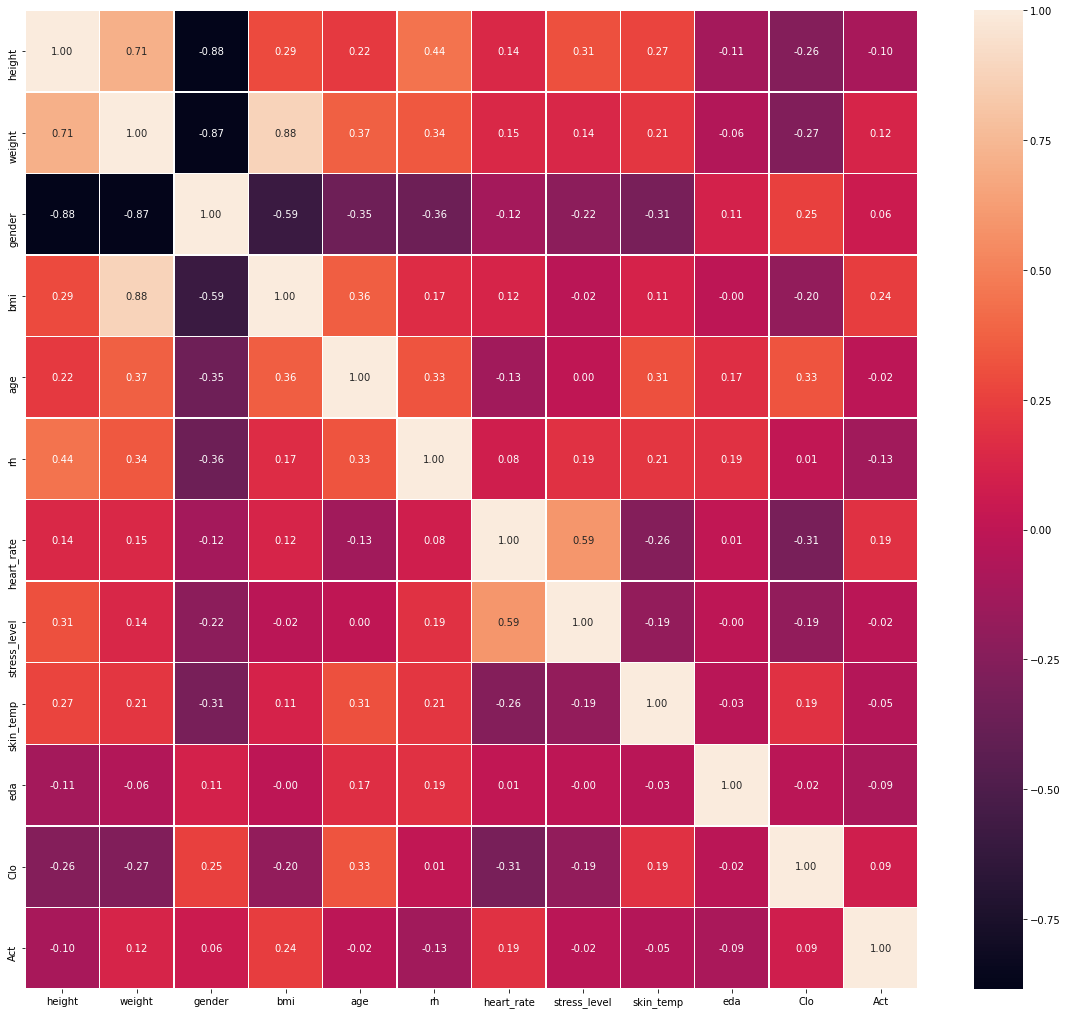

In [71]:
plt.rcParams["figure.figsize"] = (20, 18)
sns.heatmap(X_data_refine.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show()

### backward selection

In [72]:
regr = sm.OLS(y_data_refine, X_data_refine)
regr_fit = regr.fit()

In [73]:
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.675e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:34   Log-Likelihood:                         -373.67
No. Observations:                 285   AIC:                                      771.3
Df Residuals:                     273   BIC:                                      815.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
height         585.0088     50.623     11.556      0.000     485.347     684.670
weight        -256.2794     47.922     -5.348      0.000    -350.623    -161.936
gender           0.7279      3.185      0.229      0.819      -5.543       6.998
bmi            250.5823     40.997      6.112      0.000     169.872     331.292
age           -132.5427     28.235     -4.694      0.000    -188.128     -76.957
rh              21.7365      4.997      4.350      0.000      11.899      31.574
heart_rate     -11.1205      9.526     -1.167      0.244     -29.874       7.633
stress_level     0.5513      2.268      0.243      0.808      -3.913       5.016
skin_temp      -30.7904     42.079     -0.732      0.465    -113.631      52.050
eda              0.6841     18.990      0.036      0.971     -36.702      38.070
Clo            -20.2790      4.300     -4.716      0.000     -28.744     -11.814
Act             33.2513      7.576      4.389      0.000      18.337      48.166
==============================================================================
Omnibus:                        0.503   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.377
Skew:                          -0.086   Prob(JB):                        0.828
Kurtosis:                       3.047   Cond. No.                         249.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_rm = X_data_refine

#### remove eda

In [75]:
X_rm = X_rm.drop(columns='eda')

In [76]:
regr = sm.OLS(y_data_refine, X_rm)
regr_fit = regr.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.834e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:35   Log-Likelihood:                         -373.67
No. Observations:                 285   AIC:                                      769.3
Df Residuals:                     274   BIC:                                      809.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
height         584.8445     50.326     11.621      0.000     485.771     683.918
weight        -256.2773     47.834     -5.358      0.000    -350.447    -162.108
gender           0.7349      3.173      0.232      0.817      -5.513       6.982
bmi            250.5810     40.922      6.123      0.000     170.020     331.142
age           -132.3337     27.582     -4.798      0.000    -186.633     -78.034
rh              21.7747      4.875      4.467      0.000      12.178      31.371
heart_rate     -11.1130      9.506     -1.169      0.243     -29.828       7.602
stress_level     0.5505      2.264      0.243      0.808      -3.906       5.007
skin_temp      -30.8232     41.992     -0.734      0.464    -113.492      51.845
Clo            -20.3022      4.243     -4.784      0.000     -28.656     -11.948
Act             33.2307      7.540      4.407      0.000      18.386      48.075
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.383
Skew:                          -0.086   Prob(JB):                        0.826
Kurtosis:                       3.048   Cond. No.                         249.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### remove stress_level

In [77]:
X_rm = X_rm.drop(columns='stress_level')

In [78]:
regr = sm.OLS(y_data_refine, X_rm)
regr_fit = regr.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.024e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:36   Log-Likelihood:                         -373.70
No. Observations:                 285   AIC:                                      767.4
Df Residuals:                     275   BIC:                                      803.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height       585.8175     50.080     11.698      0.000     487.228     684.407
weight      -255.9021     47.728     -5.362      0.000    -349.860    -161.944
gender         0.7033      3.165      0.222      0.824      -5.528       6.935
bmi          249.6230     40.662      6.139      0.000     169.574     329.672
age         -131.6873     27.407     -4.805      0.000    -185.641     -77.734
rh            21.8396      4.859      4.495      0.000      12.274      31.405
heart_rate    -9.8344      7.907     -1.244      0.215     -25.400       5.732
skin_temp    -32.6883     41.215     -0.793      0.428    -113.826      48.450
Clo          -20.2827      4.235     -4.789      0.000     -28.621     -11.945
Act           33.1149      7.512      4.408      0.000      18.326      47.904
==============================================================================
Omnibus:                        0.524   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.385
Skew:                          -0.086   Prob(JB):                        0.825
Kurtosis:                       3.056   Cond. No.                         241.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### remove gender

In [79]:
X_rm = X_rm.drop(columns='gender')

In [80]:
regr = sm.OLS(y_data_refine, X_rm)
regr_fit = regr.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.257e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:36   Log-Likelihood:                         -373.73
No. Observations:                 285   AIC:                                      765.5
Df Residuals:                     276   BIC:                                      798.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height       590.0846     46.172     12.780      0.000     499.191     680.978
weight      -265.1108     23.628    -11.220      0.000    -311.624    -218.598
bmi          256.3902     26.894      9.534      0.000     203.448     309.333
age         -132.5524     27.082     -4.894      0.000    -185.866     -79.239
rh            22.0619      4.747      4.648      0.000      12.718      31.406
heart_rate    -9.9747      7.868     -1.268      0.206     -25.464       5.515
skin_temp    -34.1035     40.650     -0.839      0.402    -114.127      45.920
Clo          -20.2750      4.228     -4.796      0.000     -28.598     -11.952
Act           33.4806      7.317      4.576      0.000      19.076      47.885
==============================================================================
Omnibus:                        0.609   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.444
Skew:                          -0.089   Prob(JB):                        0.801
Kurtosis:                       3.075   Cond. No.                         197.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### remove skin_temp

In [81]:
X_rm = X_rm.drop(columns='skin_temp')

In [82]:
regr = sm.OLS(y_data_refine, X_rm)
regr_fit = regr.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.542e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:37   Log-Likelihood:                         -374.09
No. Observations:                 285   AIC:                                      764.2
Df Residuals:                     277   BIC:                                      793.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height       557.4999     24.953     22.342      0.000     508.378     606.622
weight      -251.9949     17.706    -14.232      0.000    -286.851    -217.139
bmi          243.2577     21.857     11.130      0.000     200.231     286.284
age         -135.1650     26.888     -5.027      0.000    -188.096     -82.234
rh            21.8717      4.739      4.616      0.000      12.543      31.200
heart_rate    -8.1628      7.562     -1.079      0.281     -23.049       6.723
Clo          -20.7251      4.192     -4.945      0.000     -28.976     -12.474
Act           33.4590      7.313      4.575      0.000      19.062      47.856
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.572
Skew:                          -0.106   Prob(JB):                        0.751
Kurtosis:                       3.059   Cond. No.                         113.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### remove heart_rate

In [83]:
X_rm = X_rm.drop(columns='heart_rate')

In [84]:
regr = sm.OLS(y_data_refine, X_rm)
regr_fit = regr.fit()
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.903e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:00:38   Log-Likelihood:                         -374.69
No. Observations:                 285   AIC:                                      763.4
Df Residuals:                     278   BIC:                                      789.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height       548.1098     23.395     23.429      0.000     502.057     594.163
weight      -247.8081     17.282    -14.339      0.000    -281.827    -213.789
bmi          239.0907     21.520     11.110      0.000     196.728     281.453
age         -132.7884     26.806     -4.954      0.000    -185.556     -80.021
rh            21.2944      4.710      4.521      0.000      12.023      30.566
Clo          -19.5767      4.055     -4.827      0.000     -27.560     -11.593
Act           31.7347      7.139      4.445      0.000      17.682      45.788
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.238
Skew:                          -0.066   Prob(JB):                        0.888
Kurtosis:                       3.053   Cond. No.                         103.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## linear regression (final try)

### single linear regression

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_rm, y_data_refine, test_size=0.2, random_state=1208)

In [86]:
n_features = X_train.shape[1]

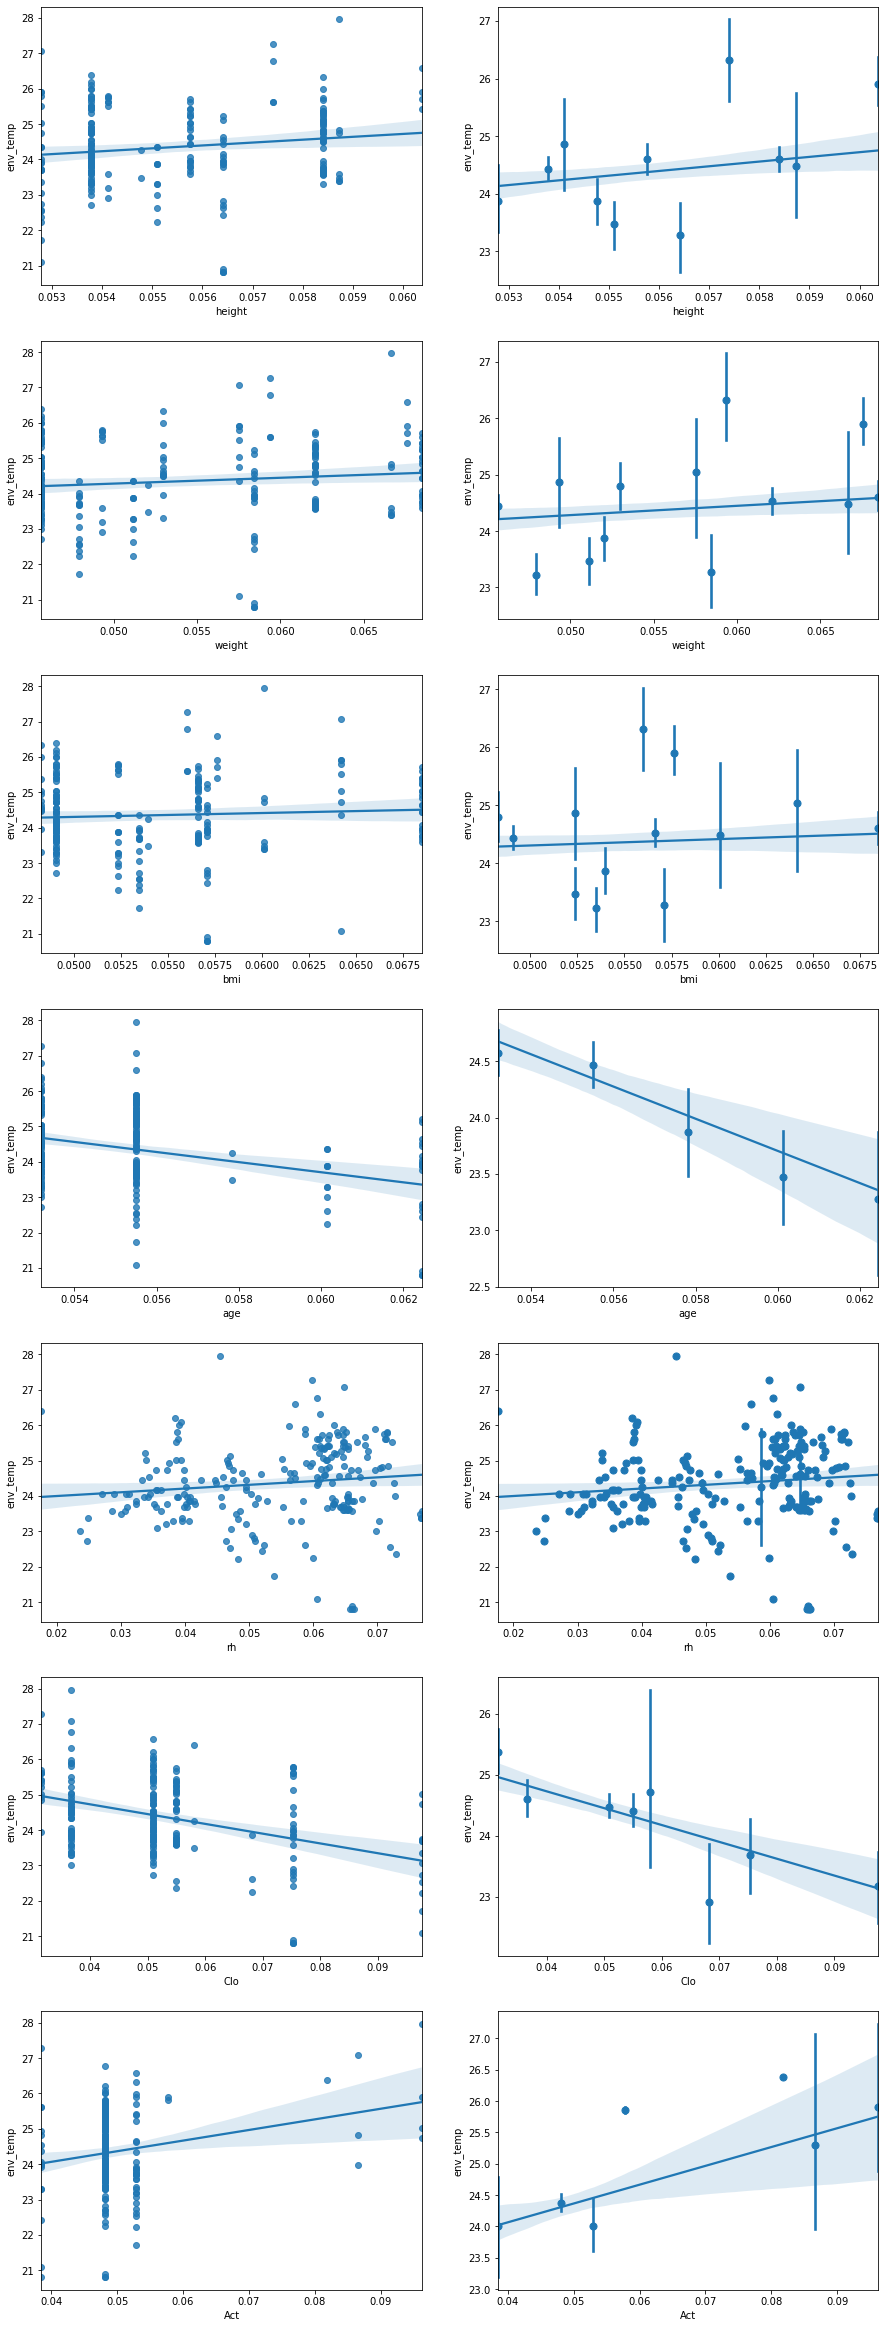

In [87]:
plt.figure(figsize=(15, 6*n_features))
i = 1
for col_n in X_train.columns:
    # left
    plt.subplot(n_features, 2, i)
    sns.regplot(x=X_train[col_n], y=y_train)
    i += 1
    
    # right
    plt.subplot(n_features, 2, i)
    sns.regplot(x=X_train[col_n], y=y_train, x_estimator=np.mean)
    i += 1

### multiple linear regression

In [88]:
regr = sm.OLS(y_train, X_train)

In [89]:
regr_fit = regr.fit()

In [90]:
y_pred = regr_fit.predict(X_test)

In [91]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
190,25.841111,24.641350
30,26.390000,24.614965
261,24.641111,24.422981
247,23.868889,24.382610
13,24.737778,24.712879
81,23.677222,24.372325
116,24.545000,24.645451
175,23.003889,24.260741
167,24.652778,24.559384
271,25.282778,25.471384


In [92]:
regr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               env_temp   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.149e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                   3.16e-309
Time:                        22:00:48   Log-Likelihood:                         -307.95
No. Observations:                 228   AIC:                                      629.9
Df Residuals:                     221   BIC:                                      653.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height       554.0712     26.226     21.127      0.000     502.386     605.756
weight      -252.0104     19.678    -12.807      0.000    -290.791    -213.229
bmi          245.1526     24.160     10.147      0.000     197.540     292.765
age         -141.5739     30.048     -4.712      0.000    -200.791     -82.357
rh            18.3322      5.509      3.328      0.001       7.476      29.189
Clo          -18.6764      4.731     -3.948      0.000     -28.000      -9.353
Act           35.3283      7.880      4.483      0.000      19.798      50.858
==============================================================================
Omnibus:                        0.230   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.342
Skew:                          -0.064   Prob(JB):                        0.843
Kurtosis:                       2.861   Cond. No.                         99.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# mean squared error
mean_squared_error(y_test, y_pred)

0.5909728256781818

In [94]:
# R2 score
r2_score(y_test, y_pred)

0.3014293687833344

## cross validation

In [95]:
from sklearn import metrics
# metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [96]:
lr = LinearRegression()
lr_cv_mse = cross_val_score(lr, X_rm, y_data_refine, scoring='neg_mean_squared_error', cv=10)

In [97]:
lr_cv_mse

array([-0.64373758, -0.71784888, -0.72586986, -0.89663719, -1.14407771,
       -0.93267401, -0.637566  , -0.94758738, -0.99712178, -0.88756546])

In [98]:
np.abs(lr_cv_mse.mean())

0.8530685849768475

In [99]:
lr_cv_r2 = cross_val_score(lr, X_rm, y_data_refine, scoring='r2', cv=10)

In [100]:
lr_cv_r2.mean()

0.23905805754946868